In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from smyleutils import averaging_utils as avg
from smyleutils import qboplot_utils as qbo
from smyleutils import colorbar_utils as cbars

In [2]:
plotpath="/project/cas/islas//python_plots/NCAR_CW3E_SMYLE/FIGURES/"

### Read in the data

In [3]:
basepath="/project/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/Uzm/"
high_nov=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init11.nc')
low_nov=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init11.nc')
era5_nov=xr.open_dataset(basepath+'Uzm_ERA5_day_init11.nc')

### Take the 1st 6 months since that's what we have for L83

In [4]:
startdate=high_nov.time.isel(time=0).values ; enddate=high_nov.time.isel(time=high_nov.time.size-1).values
high_nov = high_nov.sel(time=slice(startdate,enddate)).Uzm
low_nov = low_nov.sel(time=slice(startdate,enddate)).Uzm
era5_nov = era5_nov.sel(time=slice(startdate,enddate)).Uzm

### Average over the tropics

In [5]:
high_nov_tr = avg.cosweightlat(high_nov,-5,5).load()
low_nov_tr = avg.cosweightlat(low_nov,-5,5).load()
era5_nov_tr = avg.cosweightlat(era5_nov,-5,5).load()

DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat


### Interpolate the model data onto the ERA5 grid

In [6]:
high_nov_tr_interp = high_nov_tr.interp(ilev=era5_nov.level)
low_nov_tr_interp = low_nov_tr.interp(ilev=era5_nov.level)

### Calculate the ensemble mean

In [7]:
high_nov_tr_interpm = high_nov_tr_interp.mean('M')
low_nov_tr_interpm = low_nov_tr_interp.mean('M')

### Calculate the lead dependent climatology

In [8]:
era5_nov_tr_clim = era5_nov_tr.mean('init_year')
high_nov_tr_interpm_clim = high_nov_tr_interpm.mean('init_year')
low_nov_tr_interpm_clim = low_nov_tr_interpm.mean('init_year')

### Subtract the lead dependent climatology

In [9]:
era5_nov_tr = era5_nov_tr - era5_nov_tr_clim
high_nov_tr_interp = high_nov_tr_interp - high_nov_tr_interpm_clim
low_nov_tr_interp = low_nov_tr_interp - low_nov_tr_interpm_clim
high_nov_tr_interpm = high_nov_tr_interpm - high_nov_tr_interpm_clim
low_nov_tr_interpm = low_nov_tr_interpm - low_nov_tr_interpm_clim

### Composite based on 60 hPa zonal mean zonal wind

In [10]:
era5_60day1 = era5_nov_tr.sel(level=60., method='nearest').isel(time=0)
era5_60day1_std = era5_60day1.std('init_year')

In [11]:
iwest = np.argwhere(era5_60day1.values > era5_60day1_std.values)
westera5 = era5_nov_tr.isel(init_year=era5_60day1.values >  era5_60day1_std.values)
eastera5 = era5_nov_tr.isel(init_year=era5_60day1.values < -1.*era5_60day1_std.values)
westhigh = high_nov_tr_interp.isel(init_year=era5_60day1.values >  era5_60day1_std.values)
easthigh = high_nov_tr_interp.isel(init_year=era5_60day1.values < -1.*era5_60day1_std.values)
westlow = low_nov_tr_interp.isel(init_year=era5_60day1.values >  era5_60day1_std.values)
eastlow = low_nov_tr_interp.isel(init_year=era5_60day1.values < -1.*era5_60day1_std.values)

In [12]:
westera5m = westera5.mean('init_year')
eastera5m = eastera5.mean('init_year')
westhighm = westhigh.mean('init_year')
easthighm = easthigh.mean('init_year')
westlowm = westlow.mean('init_year')
eastlowm = eastlow.mean('init_year')

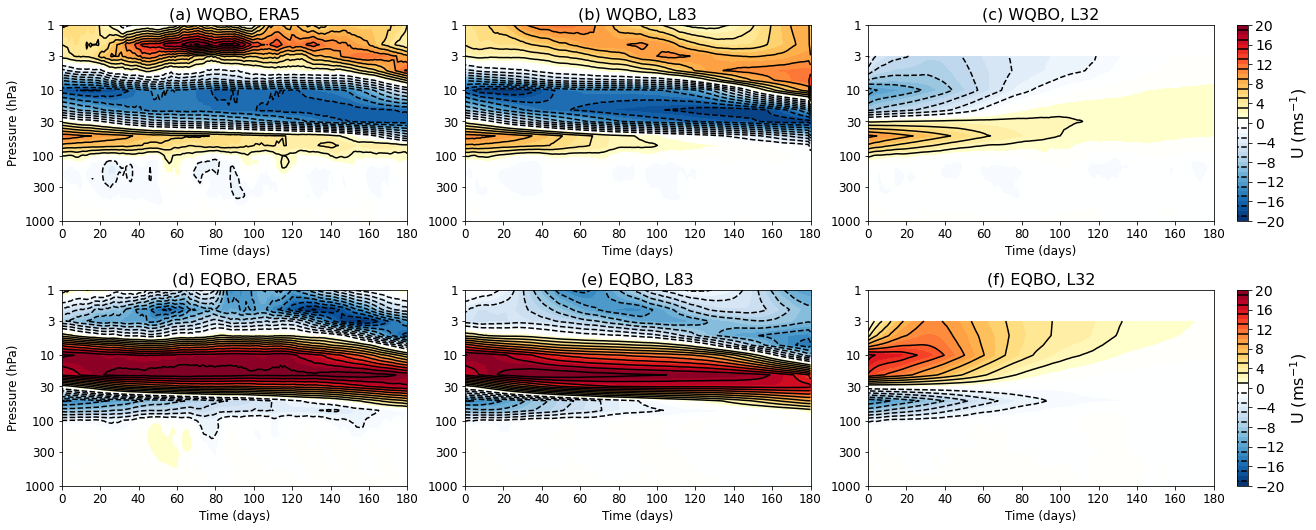

In [13]:
fig = plt.figure(figsize=(16,16))

ax = qbo.plot_lev_time(fig, westera5m, np.arange(0,westera5m.time.size,1), westera5m.level,1,-20,20,'(a) WQBO, ERA5',0.02,0.32,0.8,0.97,plevvar='level',
                         contourlines=True, contourlinescale=2)

ax = qbo.plot_lev_time(fig, westhighm.mean('M'), np.arange(0,westhighm.time.size,1), westhighm.level,1,-20,20,'(b) WQBO, L83',0.37,0.67,0.8,0.97,plevvar='level',
                       contourlines=True, contourlinescale=2, ylabel=False)

ax = qbo.plot_lev_time(fig, westlowm.mean('M'), np.arange(0,westlowm.time.size,1), westlowm.level,1,-20,20,'(c) WQBO, L32',0.72,1.02,0.8,0.97,plevvar='level',
                       contourlines=True, contourlinescale=2, ylabel=False)

ax = cbars.plotcolorbar(fig, 1,-20,20,'U (ms$^{-1}$)',1.04,1.05,0.8,0.97,orient='vertical',
                        ticks=[-20,-16,-12,-8,-4,0,4,8,12,16,20], contourlines=True, contourlinescale=2)


ax = qbo.plot_lev_time(fig, eastera5m, np.arange(0,eastera5m.time.size,1), eastera5m.level,1,-20,20,'(d) EQBO, ERA5',0.02,0.32,0.57,0.74,plevvar='level',
                         contourlines=True, contourlinescale=2)

ax = qbo.plot_lev_time(fig, easthighm.mean('M'), np.arange(0,easthighm.time.size,1), easthighm.level,1,-20,20,'(e) EQBO, L83',0.37,0.67,0.57,0.74,plevvar='level',
                       contourlines=True, contourlinescale=2, ylabel=False)

ax = qbo.plot_lev_time(fig, eastlowm.mean('M'), np.arange(0,eastlowm.time.size,1), eastlowm.level,1,-20,20,'(f) EQBO, L32',0.72,1.02,0.57,0.74,plevvar='level',
                       contourlines=True, contourlinescale=2, ylabel=False)

ax = cbars.plotcolorbar(fig, 1,-20,20,'U (ms$^{-1}$)',1.04,1.05,0.57,0.74,orient='vertical',
                        ticks=[-20,-16,-12,-8,-4,0,4,8,12,16,20], contourlines=True, contourlinescale=2)


fig.savefig(plotpath+'fig2_qbocomposite.png', bbox_inches='tight', facecolor='white')